# Keras Basics


## Dataset

We will use the famous Iris Data set.
_____
More info on the data set:
https://en.wikipedia.org/wiki/Iris_flower_data_set

## Reading in the Data Set

We've already downloaded the dataset, its in this folder. So let's open it up. 

In [1]:
import numpy as np

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
X = iris.data
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
# class 0 --> [1,0,0]
# class 1 --> [0,1,0]
# class 2 --> [0,0,1]

In [7]:
from tensorflow.keras.utils import to_categorical

In [8]:
y = to_categorical(y)
y.shape

(150, 3)

## Split the Data into Training and Test

Its time to split the data into a train/test set. Keep in mind, sometimes people like to split 3 ways, train/test/validation. We'll keep things simple for now. **Remember to check out the video explanation as to why we split and what all the parameters mean!**

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.33, random_state=42)

## Standardizing the Data

Usually when using Neural Networks, you will get better performance when you standardize the data. Standardization just means normalizing the values to all fit between a certain range, like 0-1, or -1 to 1.

The scikit learn library also provides a nice function for this.

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler_object = MinMaxScaler()

scaler_object.fit(X_train)

MinMaxScaler()

In [12]:
scaled_X_train = scaler_object.transform(X_train)
scaled_X_test = scaler_object.transform(X_test)

## Building the Network with Keras

Let's build a simple neural network!

In [13]:
from keras.models import Sequential
from keras.layers import Dense

In [14]:
model = Sequential()
model.add(Dense(8,input_dim=4,activation='relu'))
model.add(Dense(8,input_dim=4,activation='relu'))
model.add(Dense(3,activation='softmax')) # [.2,.3,.5] returns the highest probability idx
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 139 (556.00 Byte)
Trainable params: 139 (556.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Fit (Train) the Model

In [16]:
model.fit(scaled_X_train,y_train,epochs=150,verbose=2)

Epoch 1/150
4/4 - 0s - loss: 1.1001 - accuracy: 0.3500 - 137ms/epoch - 34ms/step
Epoch 2/150
4/4 - 0s - loss: 1.0897 - accuracy: 0.3500 - 3ms/epoch - 631us/step
Epoch 3/150
4/4 - 0s - loss: 1.0799 - accuracy: 0.3400 - 2ms/epoch - 591us/step
Epoch 4/150
4/4 - 0s - loss: 1.0709 - accuracy: 0.3400 - 2ms/epoch - 575us/step
Epoch 5/150
4/4 - 0s - loss: 1.0618 - accuracy: 0.4000 - 2ms/epoch - 589us/step
Epoch 6/150
4/4 - 0s - loss: 1.0531 - accuracy: 0.4200 - 4ms/epoch - 892us/step
Epoch 7/150
4/4 - 0s - loss: 1.0450 - accuracy: 0.4700 - 3ms/epoch - 702us/step
Epoch 8/150
4/4 - 0s - loss: 1.0372 - accuracy: 0.5500 - 3ms/epoch - 659us/step
Epoch 9/150
4/4 - 0s - loss: 1.0295 - accuracy: 0.5900 - 3ms/epoch - 641us/step
Epoch 10/150
4/4 - 0s - loss: 1.0219 - accuracy: 0.6200 - 3ms/epoch - 678us/step
Epoch 11/150
4/4 - 0s - loss: 1.0150 - accuracy: 0.6200 - 3ms/epoch - 718us/step
Epoch 12/150
4/4 - 0s - loss: 1.0078 - accuracy: 0.6300 - 2ms/epoch - 615us/step
Epoch 13/150
4/4 - 0s - loss: 1.0010

Epoch 103/150
4/4 - 0s - loss: 0.4627 - accuracy: 0.9100 - 2ms/epoch - 599us/step
Epoch 104/150
4/4 - 0s - loss: 0.4597 - accuracy: 0.9100 - 3ms/epoch - 738us/step
Epoch 105/150
4/4 - 0s - loss: 0.4566 - accuracy: 0.9000 - 2ms/epoch - 596us/step
Epoch 106/150
4/4 - 0s - loss: 0.4537 - accuracy: 0.8800 - 2ms/epoch - 582us/step
Epoch 107/150
4/4 - 0s - loss: 0.4510 - accuracy: 0.8800 - 2ms/epoch - 574us/step
Epoch 108/150
4/4 - 0s - loss: 0.4484 - accuracy: 0.9000 - 2ms/epoch - 567us/step
Epoch 109/150
4/4 - 0s - loss: 0.4458 - accuracy: 0.9100 - 3ms/epoch - 704us/step
Epoch 110/150
4/4 - 0s - loss: 0.4432 - accuracy: 0.9000 - 3ms/epoch - 636us/step
Epoch 111/150
4/4 - 0s - loss: 0.4405 - accuracy: 0.8800 - 2ms/epoch - 564us/step
Epoch 112/150
4/4 - 0s - loss: 0.4390 - accuracy: 0.8400 - 2ms/epoch - 519us/step
Epoch 113/150
4/4 - 0s - loss: 0.4371 - accuracy: 0.8300 - 2ms/epoch - 612us/step
Epoch 114/150
4/4 - 0s - loss: 0.4345 - accuracy: 0.8400 - 2ms/epoch - 594us/step
Epoch 115/150
4/

## Predicting New Unseen Data

Let's see how we did by predicting on **new data**. Remember, our model has **never** seen the test data that we scaled previously! This process is the exact same process you would use on totally brand new data. For example , a brand new bank note that you just analyzed .

In [27]:
preds = model.predict(scaled_X_test).argmax(axis=1)

2/2 [==============================] - 0s 2ms/step


# Evaluating Model Performance

So how well did we do? How do we actually measure "well". Is 95% accuracy good enough? It all depends on the situation. Also we need to take into account things like recall and precision. Make sure to watch the video discussion on classification evaluation before running this code!

In [28]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

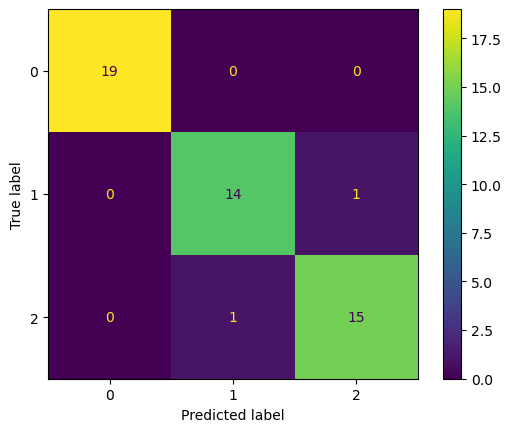

In [32]:
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), preds)

In [29]:
print(classification_report(y_test.argmax(axis=1), preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      0.93      0.93        15
           2       0.94      0.94      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



## Saving and Loading Models

Now that we have a model trained, let's see how we can save and load it.

In [34]:
model.save('myfirstmodel.keras')

In [35]:
from keras.models import load_model

In [36]:
new_model = load_model('myfirstmodel.keras')

In [40]:
new_model.predict(scaled_X_test).argmax(axis=1)

2/2 [==============================] - 0s 2ms/step


array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])